### Course Structure
https://www.analyticsvidhya.com/blog/2018/11/neural-networks-hyperparameter-tuning-regularization-deeplearning/

Part 1 of this series covered concepts like how both shallow and deep neural networks work, how to implement forward and backpropagation on single as well as multiple training examples, among other things. Now comes the question of how to tweak these neural networks in order to extract the maximum accuracy out of them.

Course 2, which we will see in this article, spans three modules:

* In module 1, we will be covering the practical aspects of deep learning. We will see how to split the training, validation and test sets from the given data. We will also be covering topics like regularization, dropout, normalization, etc. that help us make our model more efficient.
* In module 2, we will discuss the concept of a mini-batch gradient descent and a few more optimizers like Momentum, RMSprop, and ADAM.
* In the last module, we will see how different hyperparameters can be tuned to improve the model’s efficiency. We will also cover the concept of Batch Normalization and how to solve a multi-class classification challenge.

https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

## An example
We are going to work with feed-forward networks similar to the picture adopted from Wikimedia below.
![ Diagram of a Convolutional Neural Network](https://drive.google.com/uc?id=1l_2U8B6rjMEd86GI9f4OLGH8Ih6K00EY)

The image shows you that you feed an image as an input to the network, which goes through multiple convolutions, subsampling, a fully connected layer and finally outputs something.
<br><br>
#### The Fashion-MNIST dataset
Fashion-MNIST is similar to the MNIST dataset that collects Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

### Loading and preparing the data

In [0]:
## Load the data
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [0]:
## Analyze the data
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Ground Truth : 9')

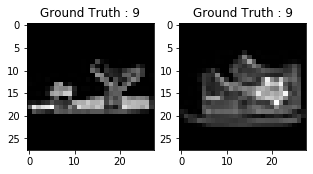

In [0]:
### Visualize the image examples

plt.figure(figsize=[5,5])

# Display the last image in training data
plt.subplot(121)
plt.imshow(train_X[-1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the last image in testing data
plt.subplot(122)
plt.imshow(test_X[-1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like sandals, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. 

#### Data preproessing

In [0]:
## data reshaping
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

## Data format changing and normalization (data scaling)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
### Split the training data into two parts, one designed for training and another one for validation. 
### In this case, you will train the model on 80% of the training data and validate it on 20% of the remaining training data.
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


### **A simple convolutional neural network**
![the network architecture](https://drive.google.com/uc?id=1BWIwxK3qmCnhvqc8qWqZkAnhWMjv4CQE)

In [0]:
## The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network. 
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10
#################################
# The neural network architecture
#################################

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))   
fashion_model.add(Dense(num_classes, activation='softmax'))              

In [0]:
### Model compiling
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)      

### Understand model performance
#### Train the model

In [0]:
### It's time to train the model with Keras' fit() function
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





48000/48000 [==============================] - 20s 421us/step - loss: 0.4635 - acc: 0.8314 - val_loss: 0.3350 - val_acc: 0.8804
Epoch 2/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.2907 - acc: 0.8929 - val_loss: 0.2825 - val_acc: 0.8952
Epoch 3/20
48000/48000 [==============================] - 6s 128us/step - loss: 0.2459 - acc: 0.9088 - val_loss: 0.2666 - val_acc: 0.9019
Epoch 4/20
48000/48000 [==============================] - 6s 128us/step - loss: 0.2122 - acc: 0.9219 - val_loss: 0.2660 - val_acc: 0.9054
Epoch 5/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.1882 - acc: 0.9304 - val_loss: 0.2292 - val_acc: 0.9152
Epoch 6/20
48000/48000 [==============================] - 6s 130us/step - loss: 0.1642 - acc: 0.9377 - val_loss: 0.2437 - val_acc: 0.9135
Epoch 7/20
48000/48

You trained the model on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss

### Check for overfitting
* We can first ensure the neural network performs well on the testing data to verify that the neural network does not overfit. <br>
* What is overfitting? <br>
<I><font color=7714e6> In machine learning, overfitting is a phenomenon where a machine learning model models the training data too well but fails to perform well on the testing data. Performing sufficiently good on testing data is considered as a kind of ultimatum in machine learning.


![alt text](https://drive.google.com/uc?export&id=1FiZDQG5RngJb7CAa8Cp4cUr8w-YQgf1C)

#### How to identify if your model is overfitting?<br> 
You can just cross check the training accuracy and testing accuracy. If training accuracy is much higher than testing accuracy then you can posit that your model has overfitted. <br>
You can also plot the predicted points on a graph to verify.

#### Model evauation on the test set

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 54us/step
Test loss: 0.49096115071699026
Test accuracy: 0.9038


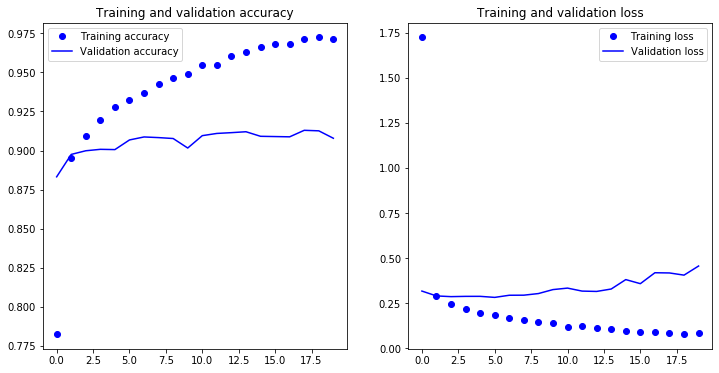

In [0]:
## put the model evaluation into perspective and plot the accuracy and loss plots between training and validation data
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(epochs, accuracy, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax1.title.set_text('Training and validation accuracy')
ax1.legend()
#plt.figure()
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.legend()
ax2.title.set_text('Training and validation loss')

#### A few techniques that can reduce overfitting:
    * Regularisation of data (L1 or L2).
    * Dropouts — Randomly dropping connections between neurons, forcing the network to find new paths and generalise.
    * Early Stopping — Precipitates the training of the neural network, leading to reduction in error in the test set.

**You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount.**

In a CNN, each neuron produces one feature map. Since dropout spatial dropout works per-neuron, dropping a neuron means that the corresponding feature map is dropped - e.g. each position has the same value (usually 0). So each feature map is either fully dropped or not dropped at all.

Pooling usually operates separately on each feature map, so it should not make any difference if you apply dropout before or after pooling. At least this is the case for pooling operations like maxpooling or averaging.

However, if you actually use element-wise dropout (which seems to be set as default for tensorflow), it actually makes a difference if you apply dropout before or after pooling. However, there is not necessarily a wrong way of doing it. Consider the average pooling operation: if you apply dropout before pooling, you effectively scale the resulting neuron activations by 1.0 - dropout_probability, but most neurons will be non-zero (in general). If you apply dropout after average pooling, you generally end up with a fraction of (1.0 - dropout_probability) non-zero "unscaled" neuron activations and a fraction of dropout_probability zero neurons. Both seems viable to me, neither is outright wrong.

[This tutorial](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/) uses pooling before dropout and gets good results.


In [0]:
#Example of VGG-like convnet from Keras (dropout used after pooling)
'''
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data **
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors. **
# this applies 32 convolution filters of size 3x3 each. **
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)
'''

"\nimport numpy as np\nimport keras\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten\nfrom keras.layers import Conv2D, MaxPooling2D\nfrom keras.optimizers import SGD\n\n# Generate dummy data **\nx_train = np.random.random((100, 100, 100, 3))\ny_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)\nx_test = np.random.random((20, 100, 100, 3))\ny_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)\n\nmodel = Sequential()\n# input: 100x100 images with 3 channels -> (100, 100, 3) tensors. **\n# this applies 32 convolution filters of size 3x3 each. **\nmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)

In [0]:
from keras.regularizers import l2

### Adding dropout into the network
batch_size = 64
epochs = 20
num_classes = 10
#################################
# The neural network architecture
#################################

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))#, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))  ####### after maxpooling

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))#, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))  ####### after maxpooling

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))#, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
fashion_model.add(LeakyReLU(alpha=0.1))             
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.5))  ####### after maxpooling

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.4))  ####### after activation
fashion_model.add(Dense(num_classes, activation='softmax')) 

In [0]:
### Model compiling
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)        

In [0]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 137us/step - loss: 0.6398 - acc: 0.7646 - val_loss: 0.3843 - val_acc: 0.8622
Epoch 2/20
48000/48000 [==============================] - 5s 107us/step - loss: 0.4019 - acc: 0.8524 - val_loss: 0.3274 - val_acc: 0.8787
Epoch 3/20
48000/48000 [==============================] - 5s 105us/step - loss: 0.3530 - acc: 0.8712 - val_loss: 0.2994 - val_acc: 0.8903
Epoch 4/20
48000/48000 [==============================] - 5s 108us/step - loss: 0.3215 - acc: 0.8821 - val_loss: 0.2703 - val_acc: 0.9015
Epoch 5/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.3044 - acc: 0.8884 - val_loss: 0.2665 - val_acc: 0.9005
Epoch 6/20
48000/48000 [==============================] - 5s 107us/step - loss: 0.2912 - acc: 0.8922 - val_loss: 0.2579 - val_acc: 0.9042
Epoch 7/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.2793 - acc: 0.8952 - val_loss: 0.2504 - 

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 71us/step
Test loss: 0.22133314504027365
Test accuracy: 0.9209


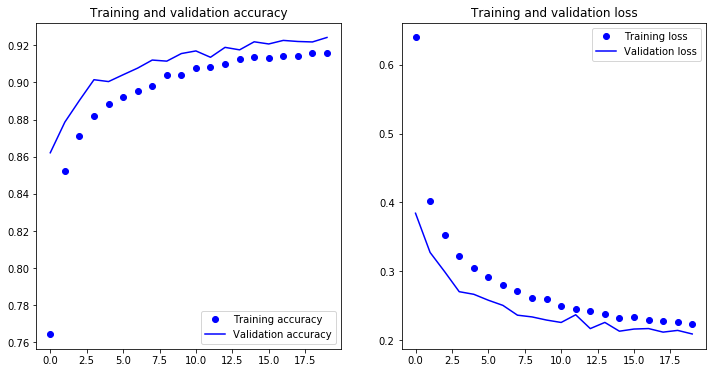

In [0]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(epochs, accuracy, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax1.title.set_text('Training and validation accuracy')
ax1.legend()
#plt.figure()
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.legend()
ax2.title.set_text('Training and validation loss')

### Data dearth dealing
There are many use cases where the amount of training data available is restricted. If you are not able to collect more data then you could resort to data augmentation techniques.
https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d
https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

#### <b>Question:</b>
Which of the followings does data augmentation do?

   A.  Adds more training data<br>
   B.  Replaces training data<br>
   C.  Does both<br>
   D.  I don’t know<br>


Technically, all the answers are correct — but the only way you know if a given definition of data augmentation is correct is via the context of its application.

#### **What is data augmentation?**

Data augmentation encompasses a wide range of techniques used to generate “new” training samples from the original ones by applying random jitters and perturbations (but at the same time ensuring that the class labels of the data are not changed).

Our goal when applying data augmentation is to increase the generalizability of the model.

Given that our network is constantly seeing new, slightly modified versions of the input data, the network is able to learn more robust features.

At testing time we do not apply data augmentation and simply evaluate our trained network on the unmodified testing data 

#### A simple data augmentation
![alt text](https://drive.google.com/uc?id=1Ne089ybJL1Bv7VmAJwYJjDwkYcx7uHEF)

**Left:** A sample of 250 data points that follow a normal distribution exactly.<br> **Right:** Adding a small amount of random “jitter” to the distribution. This type of data augmentation increases the generalizability of our networks.<br>

In the context of computer vision, we can obtain augmented data by applying simple geometric transforms, for example:<br>
*random* <br>
> translations<br>
> rotation<br>
> scaling<br>
> shearing<br>
> horizontal/ vertical flips




### Hyperparameter tuning
Instead of trying different values by hand, we will use ***GridSearchCV*** from ***Scikit-Learn*** to try out several values for our hyperparameters and compare the results. <br>
To do cross-validation with **keras**, we will use the wrappers for the Scikit-learn API.<br>
There are two warppers available:
<font color='red'>keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_parms)</font>, which implements the Scikit-learn classifier interface,<br>
<font color='red'>keras.wrappers.scikit_learn.KerasRegressor(build_fn=None, **sk_params)</font>, which implemens the Scikit-learn regressor interface.


In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#### Trying different weight initializations
The first parameter we will try to optimized via cross-validation is different weight initializations.

In [0]:
## Let's create a function that crteates the model while accepting the hyperparameters we want to tune

num_classes = 10
#################################
# The neural network architecture
#################################
def create_model(init_mode = 'uniform'):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same', kernel_initializer=init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Conv2D(64, (3, 3), activation='linear',padding='same', kernel_initializer=init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Conv2D(128, (3, 3), activation='linear',padding='same', kernel_initializer=init_mode))
  model.add(LeakyReLU(alpha=0.1))                  
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='linear', kernel_initializer=init_mode))
  model.add(LeakyReLU(alpha=0.1))   
  model.add(Dense(num_classes, activation='softmax', kernel_initializer=init_mode))    
  ## compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  
  return model         

In [0]:
import tqdm
import threading

def provide_progress_bar(function, estimated_time, tstep=0.2, tqdm_kwargs={}, args = [], kwargs={}):
  ##
  ret = [None]  # Mutable var so the function can store its return value
  def myrunner(function, ret, *args, **kwargs):
    ret[0] = function(*args, **kwargs)

  thread = threading.Thread(target=myrunner, args=(function, ret) + tuple(args), kwargs=kwargs)
  pbar = tqdm.tqdm(total=estimated_time **tqdm_kwargs)

  thread.start()
  while thread.is_alive():
    thread.join(timeout=tstep)
    pbar.update(tstep)
  pbar.close()
  return ret[0]

def progress_wrapped(estimated_time, tstep=0.2, tqdm_kwargs={}):
  ### decorate a function to add a progres bar ###
  def real_decorator(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
      return provide_progress_bar(function, estimated_time=estimated_time, tstep=tstep, tqdm_kwargs=tqdm_kwargs, args=args, kwargs=kwargs)
    return wrapper
  return real_decorator

@progress_wrapped(estimated_time = 5)
'''
# Basic example
retval = provide_progress_bar(long_running_function, estimated_time=5)
print(retval)

# Full example
retval = provide_progress_bar(long_running_function,
        estimated_time=5, tstep=1/5.0,
        tqdm_kwargs={"bar_format":'{desc}: {percentage:3.0f}%|{bar}| {n:.1f}/{total:.1f} [{elapsed}<{remaining}]'},
        args=(1, "foo"), kwargs={"spam":"eggs"}
    )
print(retval)

# Example of using the decorator
retval = another_long_running_function()
print(retval)
'''

SyntaxError: ignored

In [0]:
seed = 8
batch_size = 64
epochs = 1

np.random.seed(seed)

model_CV = KerasClassifier(build_fn=create_model, epochs = epochs, batch_size = batch_size, verbose = 1)
## define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode = init_mode)
grid = GridSearchCV(estimator = model_CV, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_X, train_label)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/1
48000/48000 [==============================] - 6s 123us/step - loss: 0.4287 - acc: 0.8455


In [0]:
#print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

#### cross-validation with more than one hyperparameter
We can do cross-validation with more than one parameters simultaneously, effectively trying out combinations of them.<br>
**Note: Cross-validation in neural networks is computationally expensive.**


In [0]:
### Let's perform a GridSearch for batch size, number of epochs and initializer combined now.
### First, create a function that creates the model (required for KerasClassifier) 
### while accepting the hyperparameters we want to tune 
### we also pass some default values such as optimizer='Adam'

def create_model2(optimizer ='Adam', init = 'glorot_uniform'):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same', kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Conv2D(64, (3, 3), activation='linear',padding='same', kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Conv2D(128, (3, 3), activation='linear',padding='same', kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.1))                  
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='linear', kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.1))   
  model.add(Dense(num_classes, activation='softmax', kernel_initializer=init))    
  ## compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer ,metrics=['accuracy'])
  
  return model 

### Algorithm ensemble
If individual neural networks are not as accurate as you want, you can create an ensemble of neural networks and combine their predictive power. For example:
* Choose different neural network architectures
* Train them on different parts of the data
* Ensemble them and use their collective predictive power to get high accuracy on test data. 

In [0]:
### Supposedly you are building a cats vs dogs classifier, 0-cat and 1-dog. 
### When combining different cats vs dogs classifiers, 
### the accuracy of the ensemble algorithm increases based on the Pearson Correlation between the individual classifiers.

### Let's look at the example below,
'''
Ground Truth: 1111111111
Classifier 1: 1111111100 = 80% accuracy
Classifier 2: 1111111100 = 80% accuracy
Classifier 3: 1011111100 = 70% accuracy
'''
from scipy.stats import pearsonr as pr

grnd_tru = [1,1,1,1,1,1,1,1,1,1]
clfr1 = [1,1,1,1,1,1,1,1,0,0]
clfr2 = [1,1,1,1,1,1,1,1,0,0]
clfr3 = [1,0,1,1,1,1,1,1,0,0]

r12, __ = pr(clfr1, clfr2)
r13, __ = pr(clfr1, clfr3)
r23, __ = pr(clfr2, clfr3)
print('r12: %f, r13: %f, r23: %f' %(r12, r13, r23))

### The Pearson Correlation of the three models is high. Therefore, ensembling them does not improve the accuracy. 
### If we ensemble the above three models using a majority vote, we get the following result.

ensemble = [int((cl1+cl2+cl3)/3 > 0.5) for cl1, cl2, cl3 in zip(clfr1, clfr2, clfr3)]
acc = [x == y for x, y in zip(grnd_tru, ensemble)]
accuracy = sum(acc)/len(acc)
print('accuracy =', accuracy)

r12: 1.000000, r13: 0.763763, r23: 0.763763
accuracy = 0.8


In [0]:
### Now let's look at three models having a very low Person Correlation between their outputs.
'''
Ground Truth: 1111111111
Classifier 1: 1111111100 = 80% accuracy
Classifier 2: 0111011101 = 70% accuracy
Classifier 3: 1000101111 = 60% accuracy
'''
grnd_tru = [1,1,1,1,1,1,1,1,1,1]
clfr1 = [1,1,1,1,1,1,1,1,0,0]
clfr2 = [0,1,1,1,0,1,1,1,0,1]
clfr3 = [1,0,0,0,1,0,1,1,1,1]

r12, __ = pr(clfr1, clfr2)
r13, __ = pr(clfr1, clfr3)
r23, __ = pr(clfr2, clfr3)
print('r12: %f, r13: %f, r23: %f' %(r12, r13, r23))

###When we ensemble these three weak learners, we get the following result.
ensemble = [int((cl1+cl2+cl3)/3 > 0.5) for cl1, cl2, cl3 in zip(clfr1, clfr2, clfr3)]
acc = [x == y for x, y in zip(grnd_tru, ensemble)]
accuracy = sum(acc)/len(acc)
print('accuracy =', accuracy)

r12: 0.218218, r13: -0.408248, r23: -0.534522
accuracy = 0.9


#### An ensemble of weak learners with low Pearson Correlation is able to outperform an ensemble with high Pearson Correlation between them.